In [1]:
import update
import params
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import transition

In [2]:
baseline = pd.read_csv('baseline.csv')

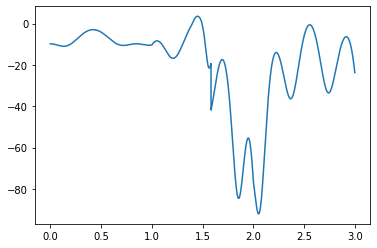

In [13]:
# -params.g * np.cos(psi) - (params.Ro - params.Rb) * (Dpsi ** 2)
plt.plot(baseline['time'], -1 * params.g * np.cos(baseline['psi']) - (params.Ro - params.Rb) * (baseline['Dpsi'])**2)

In [14]:
np.max(-1 * params.g * np.cos(baseline['psi']) - (params.Ro - params.Rb) * (baseline['Dpsi'])**2)

3.540312928620086

In [4]:
state = np.asarray([0, 0, 0, 0, params.Ro - params.Rb, 0, 0, 0, 1])
state

array([0.        , 0.        , 0.        , 0.        , 0.09023421,
       0.        , 0.        , 0.        , 1.        ])

In [5]:
times = []
states = []

In [6]:
for i in range(3000):
    times.append(i * params.h)
    states.append(state)
    t_i = 0.2
    if i >= 1000 and i <= 2000:
        t_i = -0.2
    state = update.update_all(state, t_i, debug=False)

transitioning OUTER to FREE
transitioned from FREE to OUTER


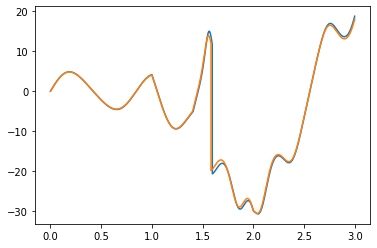

In [18]:
plt.plot(times, [state[3] for state in states])
plt.plot(baseline['time'], baseline['Dpsi'])
plt.show()

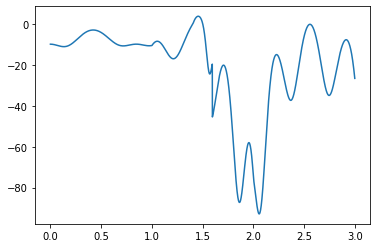

In [23]:
#plt.plot(baseline['time'], -1 * params.g * np.cos(baseline['psi']) - (params.Ro - params.Rb) * (baseline['Dpsi'])**2)

plt.plot(times, list((-1 * params.g * np.cos(state[2]) - (params.Ro - params.Rb) * (state[3])**2 for state in states)))

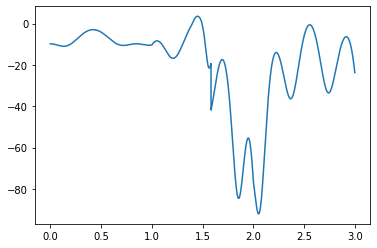

In [24]:
plt.plot(baseline['time'], -1 * params.g * np.cos(baseline['psi']) - (params.Ro - params.Rb) * (baseline['Dpsi'])**2)